In [56]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils import constants

In [91]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm')


df = pd.DataFrame()

for directory in ['16_filters', '8_filters', '4_filters', '2_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
            if 'log_var' in d:
                temp.loc[:, 'selection_method'] = 'log_var'
                window = '_'.join(d.split('_')[4:-2])
            else:
                temp.loc[:, 'selection_method'] = 'None'
                window = '_'.join(d.split('_')[4:])
            temp.loc[:, 'window'] = window

        else:
            selection_method = d.split('_')[-1]
            window = '_'.join(d.split('_')[2:-1])
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
            temp.loc[:, 'selection_method'] = selection_method
            temp.loc[:, 'window'] = window

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Remove pre-stim for now
df = df[df['window'] != 'pre_stim']

# Sort by column values
window_sorter = ['all', 'init', 'pre_rt', 'rt', 'post_rt']
select_sorter = ['None', 'log_var', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

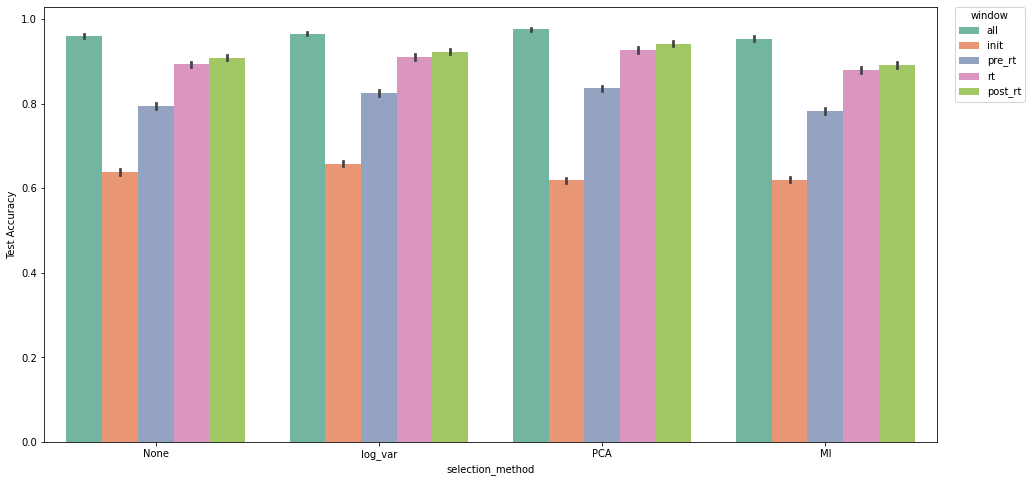

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[df['n_filters'] == 16], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

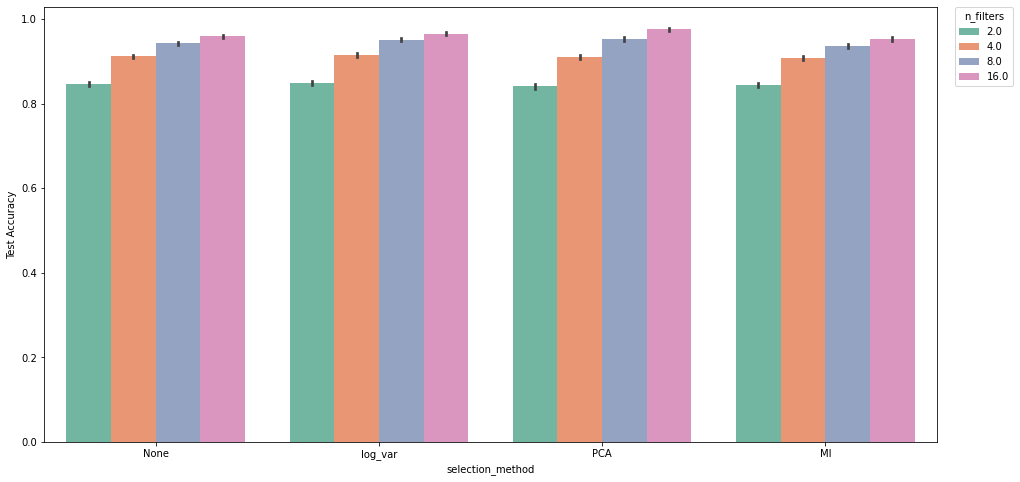

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[df['window'] == 'all'], x='selection_method', y='Test Accuracy', hue='n_filters', palette='Set2', ax=ax)
plt.legend(title='n_filters', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

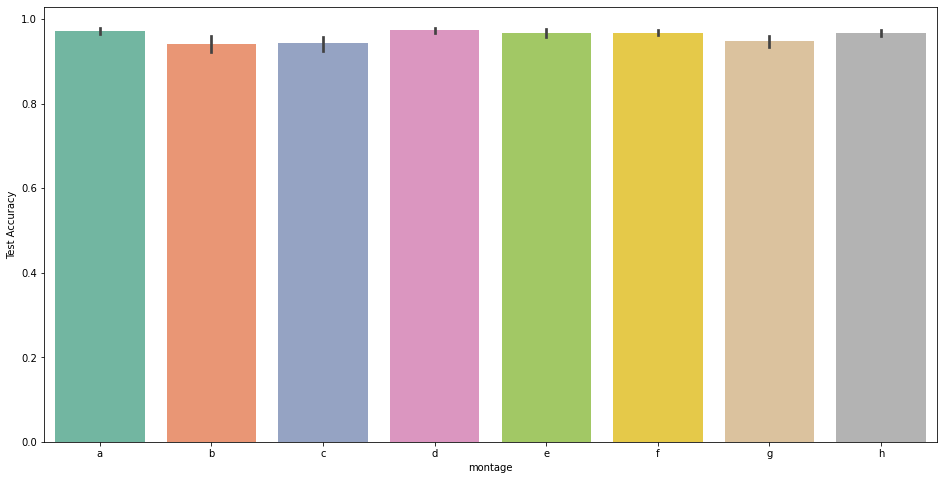

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[(df['window'] == 'all') & (df['n_filters'] == 16) & (df['selection_method'] == 'None')], x='montage', y='Test Accuracy', palette='Set2', ax=ax);

# 16 filters (32 log-var features) for RT window

Results over 5-fold cross-validation

In [90]:
pd.options.display.max_rows = 64

df[(df['n_filters'] == 16) & (df['window'] == 'post_rt')].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy  Test Precision  Test Recall   Test F1
selection_method montage                                                      
None             a             0.925826        0.928227     0.925808  0.925680
                 b             0.906639        0.909497     0.906749  0.906330
                 c             0.871405        0.873282     0.871345  0.871164
                 d             0.932982        0.934368     0.933056  0.932894
                 e             0.912775        0.916015     0.912685  0.912496
                 f             0.909953        0.914707     0.910035  0.909534
                 g             0.893464        0.898570     0.893224  0.892502
                 h             0.918554        0.921663     0.918309  0.918213
log_var          a             0.938720        0.940366     0.938657  0.938636
                 b             0.926670        0.929130     0.926682  0.926450
                 c             0.885371        0.886844     0.885289  0.884987
                 d             0.948548        0.949954     0.948635  0.948469
                 e             0.925361        0.928553     0.925349  0.925146
                 f             0.927003        0.930246     0.927069  0.926776
                 g             0.901886        0.905826     0.901581  0.900793
                 h             0.931289        0.933957     0.931058  0.931031
PCA              a             0.951098        0.952811     0.951164  0.951022
                 b             0.944854        0.947848     0.945070  0.944508
                 c             0.905776        0.906766     0.905662  0.905650
                 d             0.964033        0.965051     0.964155  0.964008
                 e             0.955413        0.957041     0.955287  0.955291
                 f             0.948495        0.950077     0.948584  0.948411
                 g             0.921429        0.925441     0.921438  0.921072
                 h             0.949341        0.950679     0.949192  0.949231
MI               a             0.916057        0.918707     0.915995  0.915879
                 b             0.892659        0.895430     0.892620  0.892288
                 c             0.856328        0.858743     0.856195  0.855904
                 d             0.917243        0.919861     0.917319  0.917030
                 e             0.901870        0.905585     0.901726  0.901527
                 f             0.892404        0.895730     0.892526  0.892124
                 g             0.863372        0.868040     0.863040  0.862296
                 h             0.897023        0.900970     0.896753  0.896559

# 16 filters (32 log-var features) for entire window

Results over 5-fold cross-validation

In [85]:
pd.options.display.max_rows = 64

df[(df['n_filters'] == 16) & (df['window'] == 'all')].groupby(['selection_method', 'montage']).mean()[test_cols]

Test Accuracy  Test Precision  Test Recall   Test F1
selection_method montage                                                      
None             a             0.972056        0.973426     0.972115  0.972002
                 b             0.941983        0.944192     0.942230  0.941621
                 c             0.943069        0.944572     0.943074  0.942929
                 d             0.973605        0.974525     0.973599  0.973574
                 e             0.967233        0.968178     0.967130  0.967186
                 f             0.967922        0.969232     0.968016  0.967879
                 g             0.948265        0.949995     0.948124  0.948067
                 h             0.967050        0.968094     0.966985  0.967003
log_var          a             0.978078        0.978819     0.978151  0.978062
                 b             0.951339        0.953558     0.951524  0.951131
                 c             0.951396        0.952509     0.951426  0.951301
                 d             0.977928        0.978718     0.977886  0.977902
                 e             0.972134        0.973173     0.972118  0.972093
                 f             0.972598        0.973626     0.972710  0.972569
                 g             0.949509        0.951044     0.949424  0.949335
                 h             0.971836        0.973016     0.971761  0.971781
PCA              a             0.987501        0.987976     0.987531  0.987491
                 b             0.972773        0.973466     0.972870  0.972739
                 c             0.953498        0.954266     0.953518  0.953383
                 d             0.989929        0.990568     0.989867  0.989911
                 e             0.985789        0.986015     0.985802  0.985782
                 f             0.983065        0.983686     0.983092  0.983044
                 g             0.956494        0.957832     0.956390  0.956387
                 h             0.977735        0.978608     0.977605  0.977696
MI               a             0.969376        0.970755     0.969463  0.969319
                 b             0.938372        0.939675     0.938535  0.938203
                 c             0.930986        0.932366     0.930925  0.930784
                 d             0.970712        0.971975     0.970676  0.970662
                 e             0.964731        0.965960     0.964602  0.964654
                 f             0.965099        0.966743     0.965130  0.965031
                 g             0.938281        0.940244     0.938231  0.938066
                 h             0.957926        0.959214     0.957866  0.957856

In [ ]:
root_dir = os.path.join(constants.RESULTS_DIR, 'stim_motor_LR', 'csp_baseline', 'linear_svm')

temp = pd.read_parquet(os.path.join(root_dir, 'no_select_linear_svm_log_var', 'None_results.parquet'))

In [104]:
root_dir = os.path.join(constants.RESULTS_DIR, 'stim_motor_LR', 'csp_baseline', 'linear_svm')


df = pd.DataFrame()

for directory in ['8_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
            if 'log_var' in d:
                temp.loc[:, 'selection_method'] = 'log_var'
                window = '_'.join(d.split('_')[4:-2])
            else:
                temp.loc[:, 'selection_method'] = 'None'
                window = '_'.join(d.split('_')[4:])
            temp.loc[:, 'window'] = window

        else:
            selection_method = d.split('_')[-1]
            window = '_'.join(d.split('_')[2:-1])
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
            temp.loc[:, 'selection_method'] = selection_method
            temp.loc[:, 'window'] = window

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Remove pre-stim for now
df = df[df['window'] != 'pre_stim']

# Sort by column values
window_sorter = ['all', 'init', 'pre_rt', 'rt', 'post_rt']
select_sorter = ['None', 'log_var', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [111]:
df.columns

Index(['0 f1-score', '0 precision', '0 recall', '0 support', '1 f1-score',
       '1 precision', '1 recall', '1 support', '2 f1-score', '2 precision',
       '2 recall', '2 support', '3 f1-score', '3 precision', '3 recall',
       '3 support', 'Test Accuracy', 'Test F1', 'Test Precision',
       'Test Recall', 'Train Accuracy', 'Train F1', 'Train Precision',
       'Train Recall', 'Valid Accuracy', 'Valid F1', 'Valid Precision',
       'Valid Recall', 'cfmat', 'idx', 'montage', 'n_features', 'n_filters',
       'subject_id', 'selection_method', 'window', 'log_var_feats',
       'classifier_type'],
      dtype='object')

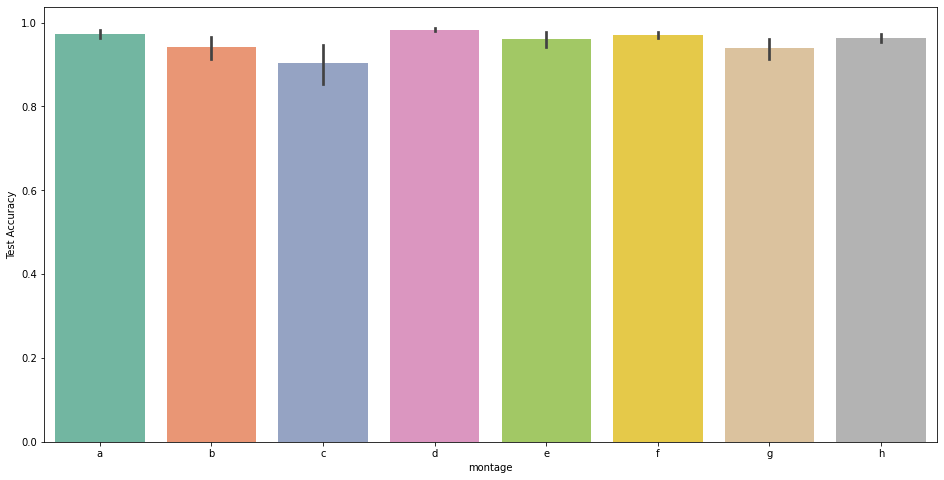

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df, x='montage', y='Test Accuracy', palette='Set2', ax=ax);

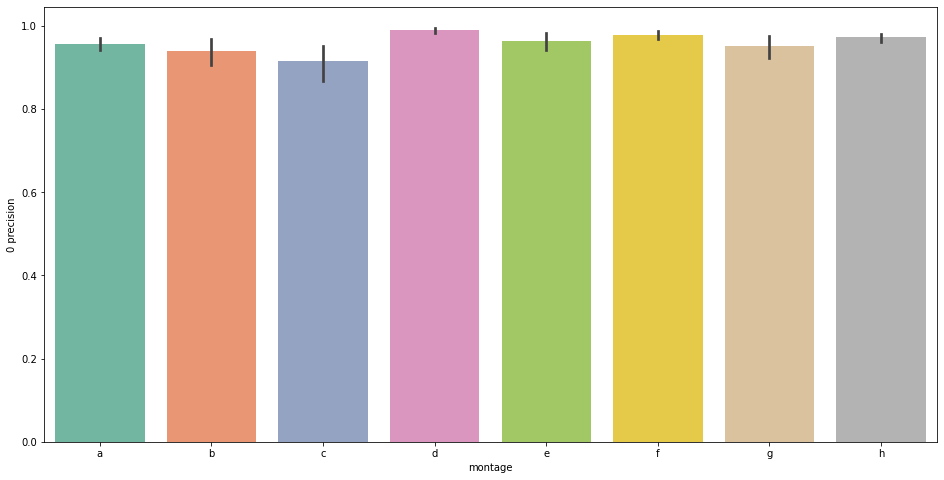

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df, x='montage', y='0 precision', palette='Set2', ax=ax);

In [109]:
df.groupby('montage').mean()[test_cols]

,Test Accuracy,Test Precision,Test Recall,Test F1
montage,,,,
a,0.973274,0.975177,0.973152,0.973271
b,0.940744,0.946153,0.940929,0.941386
c,0.902677,0.903975,0.902556,0.901943
d,0.983293,0.984804,0.983182,0.983178
e,0.960833,0.962127,0.960369,0.960320
f,0.971429,0.974063,0.971170,0.971122
g,0.939826,0.944876,0.939848,0.939247
h,0.963548,0.966329,0.963308,0.963506
